In [15]:
import numpy as np

# Define Newton-Raphson solver function.
def NRsolve(f,x_0,h = 1.,dx = 10e-5):
    '''
    x_0 = initial value to iterate from
    dx = step size
    h = tolerance
    '''
    # Approx. Derivative.
    def df(f,x,dx):
        return (f(x+dx)-f(x))/dx

    # Iterate until the difference between solutions is less than tolerance h.
    iterations = 0 # Set counter.
    difference = h
    x_i = x_0
    while not difference < h:
        iterations += 1 # Increase counter.
        x_prev = x_i
        x_i = x_i - f(x_i)/df(f,x_i,dx)
        difference = abs(x_prev - x_i)
    
    return x_i

In [10]:
def Radfunc(E):
    V_0 = 26 #MeV
    a = (1.25*(226)**(1/3))*10**-12 #m
    m = 3727.4 #MeV.c^-2
    hbar = 6.5821e-22 #MeV.s
    return np.sqrt(abs(E)) + (np.sqrt(V_0-abs(E)) / np.tan(np.sqrt(2*m*a**2*(V_0-abs(E)))/hbar))

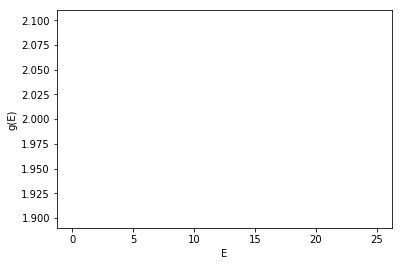

In [20]:
import matplotlib.pyplot as plt

N = 100
En = np.linspace(0,25,N) #MeV
E,G = [],[]
for en in En:
    g = NRsolve(Radfunc,2)
    plt.plot(en,g,':')

plt.xlabel('E')
plt.ylabel('g(E)')
    
plt.show()